# Алгоритм шифрования для защиты персональных данных клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span><ul class="toc-item"><li><span><a href="#Цели-и-задачи" data-toc-modified-id="Цели-и-задачи-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цели и задачи</a></span></li><li><span><a href="#Структура-данных" data-toc-modified-id="Структура-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Структура данных</a></span></li></ul></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-шифрования-данных" data-toc-modified-id="Алгоритм-шифрования-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм шифрования данных</a></span><ul class="toc-item"><li><span><a href="#Алгоритм" data-toc-modified-id="Алгоритм-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Алгоритм</a></span></li><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обоснование</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма-шифрования-данных" data-toc-modified-id="Проверка-алгоритма-шифрования-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма шифрования данных</a></span></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

## Введение

### Цели и задачи

**Цель исследования:**

Защитить персональные данные клиентов страховой компании «Хоть потоп». 

**Задачи:**

1. Изучить данные;
2. Разработать такой алгоритм шифрования данных, чтобы после преобразования сложно было восстановить информацию, при этом качество машинного обучения методом линейной регрессии не должно снизиться;
3. Обосновать корректность работы алгоритма.

### Структура данных

**Признаки:**

- **`Пол`** застрахованного лица;
- **`Возраст`** застрахованного лица;
- **`Зарплата`** застрахованного лица;
- **`Члены семьи`** — количество членов семьи застрахованного лица;

**Целевой признак:**

- **`Страховые выплаты`** — количество страховых выплат клиенту за последние 5 лет.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('https://code.s3.yandex.net//datasets/insurance.csv')

Выведем на экран первые строки датафрейма:

In [3]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Выведем основную информацию о данных:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Видим, что:
- Пропуски в данных отсутствуют;
- Столбцы **'Возраст'** и **'Зарплата'** принадлежат к типу *float*, хотя и содержат целые числа.

Приведем эти столбцы к *целочисленному* типу:

In [5]:
data['Возраст'] = data['Возраст'].astype(int)
data['Зарплата'] = data['Зарплата'].astype(int)

Проверим:

In [6]:
data.dtypes.to_frame('type')

,type
Пол,int64
Возраст,int32
Зарплата,int32
Члены семьи,int64
Страховые выплаты,int64


Теперь проверим данные на наличие дубликатов:

In [7]:
data.duplicated().sum()

153

Мы обнаружили некоторое количество полностью дублирующих друг друга строк. Уникального идентификатора пользователя у нас нет, чтобы с уверенностью утверждать, что эти строки действительно являются дубликатами. Так как признаков в таблице немного, есть вероятность полного совпадения данных о разных клиентах. Кроме того, решению нашей задачи дубликаты не мешают. Поэтому оставим их как есть.

Построим общую гистограмму для всех столбцов датафрэйма:

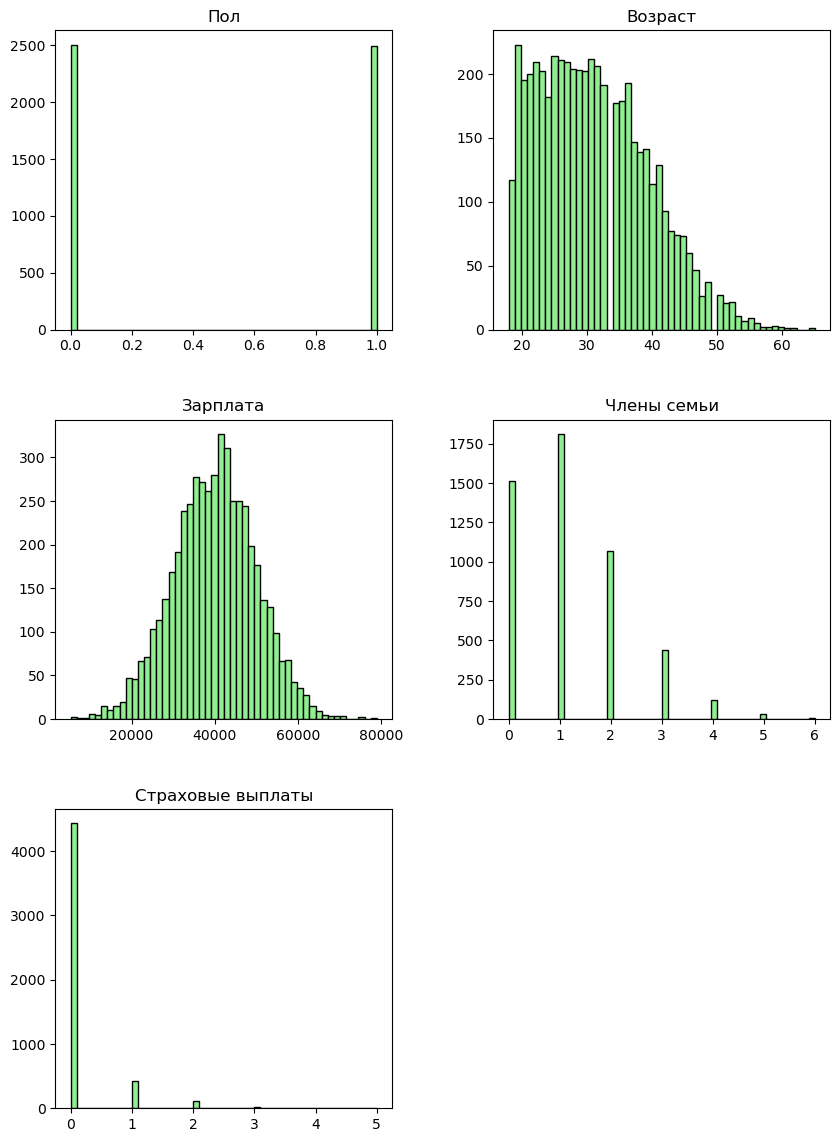

In [8]:
data.hist(figsize=(10,14), bins=50, grid=False, color='lightgreen', ec='black')
plt.show()

На гистограмме видим, что данные не содержат аномалий.

Построим также матрицу корреляций признаков:

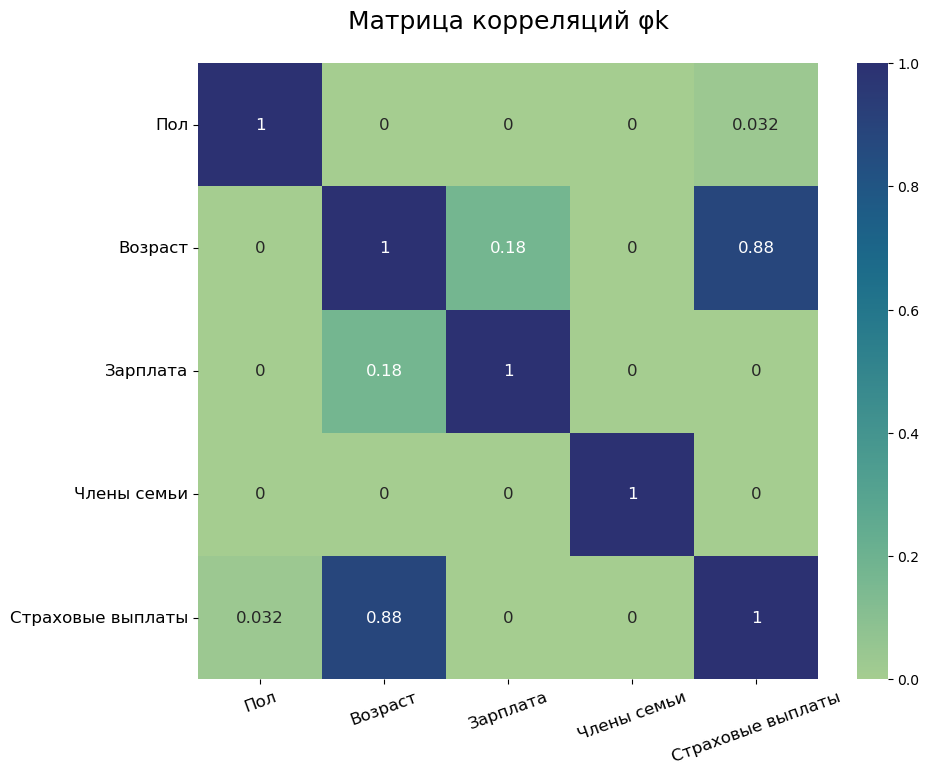

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.phik_matrix(interval_cols=['Пол', 'Возраст', 'Члены семьи', 'Страховые выплаты']),
            annot=True, cmap='crest', annot_kws={'size':12})
plt.title('Матрица корреляций φk', fontsize=18, pad=25)
plt.xticks(fontsize=12, rotation=20)
plt.yticks(fontsize=12, rotation=0)
plt.show()

Мультиколлинеарности признаков не обнаружено.

Присутствует сильная корреляция целевого признака **'Страховые выплаты'** и признака **'Возраст'**.

**Выводы:**

Мы провели обзор данных. Выяснили следующее:

- Пропуски в данных отсутствуют;
- Присутствует некоторое количество полностью дублирующих друг друга строк. Мы не стали удалять их, так как они не мешают решению нашей задачи и так как без уникального идентификатора пользователя при малом количестве признаков нельзя быть до конца уверенными, что эти строки действительно являются дубликатами, а не просто совпадениями;
- Данные не содержат аномалий;
- Мультиколлинеарности признаков не обнаружено;
- Присутствует сильная корреляция целевого признака **'Страховые выплаты'** и признака **'Возраст'**.

Теперь можем приступать к разработке алгоритма преобразования данных.

## Умножение матриц

Формула задачи обучения модели линейной регрессии для функции потерь *MSE* выглядит следующим образом:

$$w = \arg\min_w MSE(Xw, y)$$

где:

- $MSE$ — средняя квадратичная ошибка;
- $X$ — матрица признаков (нулевой столбец состоит из единиц);
- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу);
- $y$ — вектор целевого признака.

Минимальное значение *MSE* достигается, когда применяется следующая формула вектора весов линейной регрессии:

$$w = (X^T X)^{-1} X^T y$$

где:

- $X^T$ — транспонированная матрица признаков;
- $(X^T X)^{-1}$ — обратная матрица для произведения матриц $X^T X$.

Предсказания модели линейной регрессии вычисляются по формуле:

$$a = Xw$$

Докажем, что при умножении матрицы признаков $X$ на обратимую матрицу $P$ качество предсказания модели линейной регрессии не изменится, с помощью следующих свойств матричных операций:

$(AB) C = A (BC)$

$(AB)^T = B^T A^T$

$EA=AE= A$, где $E$ — единичная матрица.

Также для обратимых матриц $A$ и $B$ верно, что:

$(AB)^{-1} = B^{-1} A^{-1}$

$A^{-1}A=AA^{-1}= E$, где $E$ — единичная матрица.

Умножим матрицу признаков $X$ в формуле обучения на обратимую матрицу $P$:

$w^{'} = ((XP)^T XP)^{-1} (XP)^T y$

Раскроем скобки:

$w^{'} = (P^T X^T X P)^{-1} P^T X^T y$

$w^{'} = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$

Так как по условию матрица $P$ обратимая, $(P^T)^{-1}  P^T = E$

Таким образом формула сокращается:

$w^{'} = P^{-1} (X^T X)^{-1} X^T y$

Заметим, что в формуле правая часть $(X^T X)^{-1} X^T y$ является формулой вектора весов линейной регрессии $w$.

Таким образом $w^{'} = P^{-1} w$

Подставим $w^{'}$ и произведение метриц $X$ и $P$ в формулу предсказаний линейной регрессии:

$a^{'} = XPw^{'}$

$a^{'} = XPP^{-1} w$

Так как матрица $P$ обратимая, $PP^{-1} = E$.

Сократим формулу:

$a^{'} = Xw$

Т.к. по формуле предсказаний линейной регрессии $a = Xw$ и $a^{'} = Xw$ по доказанному, получаем, что $a^{'} = a$

Таким образом мы доказали, что предсказания $a^{'}$ для матрицы признаков $X$, умноженной на обратимую матрицу $P$, равны предсказаниям $a$ для матрицы признаков $X$.


**Значит, при умножении матрицы признаков на обратимую матрицу качество предсказания модели линейной регрессии не изменится**.

## Алгоритм шифрования данных

### Алгоритм

Для преобразования данных воспользуемся следующим алгоритмом:

0. Разобьем исходные данные на признаки и целевой признак;
1. Преобразуем признаки из датафрэйма в матрицу;
2. Создадим случайную квадратную матрицу, по ширине равную ширине матрицы признаков;
3. Проверим матрицу на обратимость. Если матрица необратима, сгенерируем новую матрицу и повторим проверку;
4. Сохраним обратную матрицу к сгенерированной нами (ключ шифрования), чтобы иметь возможность дешифровать данные;
5. Умножим матрицу признаков на сгенерированную обратимую матрицу;
6. Преобразуем полученную зашифрованную матрицу в новый датафрэйм.

Чтобы убедиться в корректности работы алгоритма:

1. Разобьем исходные и зашифрованные признаки, а также целевой признак, на обучающую и тестовую выборки;
2. Обучим и протестируем модель линейной регрессии на исходных и зашифрованных признаках;
3. Сравним метрику *R2 (коэффициент детерминации)*: если значения метрики одинаковы, задача выполнена корректно.

### Обоснование

По условию задачи нам нужно разработать такой алгоритм шифрования данных, чтобы:

1. после преобразования сложно было восстановить информацию;
2. качество машинного обучения методом линейной регрессии не снизилось.

Выше мы доказали, что при умножении матрицы признаков на обратимую матрицу качество предсказания линейной регрессии не изменится, что соответствует второму условию нашей задачи. Поэтому будет логично построить алгоритм шифрования на данном свойстве матриц. Такой подход к шифрованию называется **«шифрование аналитическим преобразованием»**.

Что касается первого условия задачи. Надежность (стойкость) шифрующего алгоритма определяется тем, насколько легко можно взломать шифр. Принято считать, что надежность шифра определяется только секретностью используемого ключа, сам же алгоритм шифрования предположительно известен оппоненту. Стойкость алгоритма шифрования обеспечивается высокой вычислительной сложностью задачи выяснения значения ключа. Т.е. надежность нашего алгоритма будет зависеть не от самого выбранного алгоритма, а в основном от того, насколько большой разброс рандомных значений мы зададим для функции, генерирующей рандомную матрицу.

Таким образом мы считаем применение вышеизложенного алгоритма шифрования персональных данных клиентов обоснованным.

## Проверка алгоритма шифрования данных

Разобьем исходные данные на признаки и целевой признак:

In [10]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

Теперь напишем функцию, которая реализует изложенный выше алгоритм шифрования персональных данных клиентов:

In [11]:
def encoder(features):
    # Преобразуем признаки в матрицу
    X = features.values
    
    # Создаем случайную квадратную матрицу, по ширине равную ширине матрицы признаков
    # Разброс значений внутри матрицы зададим в пределах от +1 000 000 до -1 000 000
    P = np.random.normal(loc=0.0, scale=1000000, size=(features.shape[1], features.shape[1]))
    
    try:
    
        # Обращаем матрицу и сохраняем ключ шифрования
        # Если матрица необратима, сработает ветка except
        P_inv = np.linalg.inv(P)
        
        # Преобразуем матрицу признаков
        XP = X @ P
        
        # Cохраняем зашифрованные признаки в новый датафрэйм
        encoded = pd.DataFrame(XP, columns=features.columns)
        
        # Возвращаем зашифрованные признаки и ключ шифрования
        return encoded, P_inv
    
    except np.linalg.LinAlgError:
        print('Матрица необратима. Попробуйте еще раз.')

Запускаем алгоритм на наших данных:

In [12]:
features_encoded, key = encoder(features)

Выведем результат работы алгоритма на экран:

In [13]:
features_encoded.head()

,Пол,Возраст,Зарплата,Члены семьи
0,5.434593e+10,-1.598834e+10,-1.619643e+08,2.304972e+10
1,4.163103e+10,-1.225147e+10,-1.190607e+08,1.766014e+10
2,2.300571e+10,-6.772361e+09,-6.427723e+07,9.759859e+09
3,4.569446e+10,-1.343849e+10,-1.395380e+08,1.937745e+10
4,2.859519e+10,-8.414632e+09,-8.376997e+07,1.212948e+10


In [14]:
key

array([[-3.82871954e-07, -1.77484400e-06,  2.72056758e-07,
         1.71333853e-07],
       [-4.21439625e-07, -2.56045670e-07,  1.17154752e-07,
         6.51447473e-07],
       [-8.56365359e-07,  1.67606254e-07, -1.96855074e-08,
         5.06901290e-07],
       [ 6.04420114e-07,  4.01002582e-06,  1.59154864e-06,
         5.15133370e-08]])

Напишем функцию для тестирования работы алгоритма:

In [15]:
def test(features, target=target):
    
    # Разбиваем признаки и целевой признак на обучающую и тестовую выборки
    features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    # Обучаем модель
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    # Делаем предсказания на тестовой выборке
    predictions = model.predict(features_test)
    
    # Считаем коэффициент детерминации
    r2 = r2_score(target_test, predictions)
    
    print('R2 линейной регрессии на тестовой выборке: {:.3f}'.format(r2))

Протестируем модель линейной регрессии на исходных признаках:

In [16]:
test(features)

R2 линейной регрессии на тестовой выборке: 0.435


А теперь на зашифрованных:

In [17]:
test(features_encoded)

R2 линейной регрессии на тестовой выборке: 0.435


Значение метрики *R2* одинаковое при тестировании как на исходных, так и на зашифрованных признаках, значит, качество предсказания линейной регрессии не изменилось, и алгоритм работает корректно.

## Итоги исследования

**Целью нашего исследования было разработать такой алгоритм шифрования персональных данных клиентов страховой компании, чтобы после преобразования сложно было восстановить информацию, при этом качество машинного обучения методом линейной регрессии не должно было снизиться**.

**В первой части** исследования мы провели обзор данных и выяснили следующее:

- Пропуски в данных отсутствуют;
- Присутствует некоторое количество полностью дублирующих друг друга строк. Мы не стали удалять их, так как они не мешают решению нашей задачи и так как без уникального идентификатора пользователя при малом количестве признаков нельзя быть до конца уверенными, что эти строки действительно являются дубликатами, а не просто совпадениями;
- Данные не содержат аномалий;
- Мультиколлинеарности признаков не обнаружено;
- Присутствует сильная корреляция целевого признака **'Страховые выплаты'** и признака **'Возраст'**.

**Во второй части** мы доказали алгебраически, что при умножении матрицы признаков на обратимую матрицу качество предсказания модели линейной регрессии не изменится.

**В третьей части** мы предложили и обосновали следующий алгоритм шифрования данных:

0. Разбиваем исходные данные на признаки и целевой признак;
1. Преобразовываем признаки из датафрэйма в матрицу;
2. Создаем случайную квадратную матрицу, по ширине равную ширине матрицы признаков;
3. Проверяем матрицу на обратимость. Если матрица необратима, генерируем новую матрицу и повторяем проверку;
4. Сохраняем обратную матрицу к сгенерированной нами (ключ шифрования), чтобы иметь возможность дешифровать данные;
5. Умножаем матрицу признаков на сгенерированную обратимую матрицу;
6. Преобразовываем полученную зашифрованную матрицу в новый датафрэйм.

И способ его проверки:

1. Разбиваем исходные и зашифрованные признаки, а также целевой признак, на обучающую и тестовую выборки;
2. Обучаем и протестируем модель линейной регрессии на исходных и зашифрованных признаках;
3. Сравниваем метрику *R2 (коэффициент детерминации)*: если значения метрики одинаковы, задача выполнена корректно.

**В заключительной части** исследования мы реализовали предложенный алгоритм шифрования и протестировали модель линейной регрессии на исходных и зашифрованных с помощью нашего алгоритма данных. Мы получили одинаковое значение метрики *R2* при тестировании модели на исходных и на зашифрованных данных, значит, качество предсказания модели не изменилось, и алгоритм работает корректно.

**Таким образом алгоритм, реализованный в функции encoder, способен защитить персональные данные клиентов страховой компании, не снижая качество машинного обучения методом линейной регрессии.**